# <span style="color:#4260E2"> Модуль 1 </span>
*Семинар 6 марта 2023*

## Темы:
+ Популяция и выборка
+ Зависимые и независимые выборки 
+ Типы переменных: категориальные, количественные 
+ Описательные статистики

## <span style="color:#055B87"> Популяции в контексте клинических исследований </span>

Вспомним, какие популяции выделяют в дизайне клинических исследований
+ ASE, All Signed Informed Consent Set
+ RAN, All Randomized Set
+ FAS/ITT (Full Analysis Set/Intent-to-treat Set)
+ PP (Per Protocol)
+ SAF (Safety Analysis Set)

*Какие статистики может быть интересно/важно/целесообразно посчитать для каждой из популяций?* 

Для примера, смоделируем данные, которые могут встретиться в реальном исследовании. 
<br>
Допустим, в некоторое исследование набрали на этапе скрининга **62 субъекта** и в рамках процедур собрали информацию.

In [1]:
# Напомним, что ИМТ: кг/м²
# Ниже - функция для вычисления веса при известном ИМТ и росте
def w_calc(h, bmi):
    w=bmi*((h/100)**2)
    w=round(w)
    return(w)

In [2]:
# импортируем необходимые библиотеки
import random 
import numpy as np
import pandas as pd

# установим seed для воспроизводимости
random.seed(100)

N=62
AGE=[random.choice(list(range(18, 46, 1))) for x in range(N)]
BMI=[*[random.choice(list(np.arange(18.5, 29.9, 0.1))) for x in range(50)], 
     *[random.choice(list(np.arange(16, 18, 0.1))) for x in range(6)], 
     *[random.choice(list(np.arange(30, 35, 0.1))) for x in range(6)]]
HEIGHT=[random.choice(list(np.arange(160, 180, 1))) for x in range(N)]
WEIGHT=[w_calc(x,y) for x, y in zip(HEIGHT, BMI)]

screening=pd.DataFrame({'AGE':AGE, 
                             'HEIGHT':HEIGHT,
                             'WEIGHT':WEIGHT,
                             'BMI':BMI}, index=list(range(1,N+1,1)))
display(screening.head())

,AGE,HEIGHT,WEIGHT,BMI
1,22,163,50,18.8
2,32,161,70,27.0
3,32,179,69,21.5
4,42,167,67,24.2
5,23,169,82,28.7


Договоримся, что по критериям включения в исследовании могут принимать участие только те субъекты, у которых индекс массы тела лежит в пределах 18.5 и 29.9 кг/м2. Таким образом, нам придется на этапе скрининга "отсеять" часть субъектов, это т.н. *скринфейлеры*.

In [3]:
# скринфейлеры
display(screening[screening['BMI'] > 29.9]) 

,AGE,HEIGHT,WEIGHT,BMI
57,45,178,101,32.0
58,36,168,87,31.0
59,23,173,91,30.3
60,24,164,94,34.8
61,23,166,87,31.7
62,44,173,103,34.5


In [4]:
# скринфейлеры
display(screening[screening['BMI'] < 18.5]) 

,AGE,HEIGHT,WEIGHT,BMI
51,23,174,53,17.5
52,18,170,51,17.8
53,37,174,51,16.8
54,30,176,51,16.4
55,22,166,44,16.1
56,42,179,57,17.8


Исключим скринфейлеров (20% субъектов) и посчитаем описательные статистики для всех субъектов, прошедших скрининг и рандомизированных в исследование:

In [186]:
randomization=screening[(screening['BMI'] <= 29.9)&(screening['BMI'] >= 18.5)]

Описательные статистики (для количественных данных):

In [187]:
stats=randomization.describe(include = 'all', percentiles=[.25,  .75])
stats.round(decimals = 3)

,AGE,HEIGHT,WEIGHT,BMI
count,50.000,50.000,50.000,50.000
mean,31.480,168.520,71.800,25.260
std,7.888,6.254,10.447,3.118
min,19.000,160.000,50.000,18.800
25%,24.000,163.000,62.500,22.875
50%,30.500,166.500,73.000,25.750
75%,38.000,174.750,77.750,27.600
max,45.000,179.000,93.000,29.800


Мы получили некоторые параметры описательной статистики для количественных данных, а именно, для **антропометрических данных**. 
<p>Вообще говоря, эти параметры могут быть <span style="color:#055B87"> какими угодно </span>. Желаемые статистики определяются исследователем на этапе планирования.</p>
Теперь рассмотрим возможные категориальные данные, например, демографические.

In [188]:
N_rand=50
races={1:'Caucasian', 2:'Asian', 3:'Negroid', 4:'Australoid'}
sexes={1:'Male', 0:'Female'}
# Races
RACE_=[random.choice(list(range(1, 5, 1))) for x in range(N_rand)]
RACE_=list((pd.Series(RACE_)).map(races))
# Sexes
SEX_=[random.choice([0, 1]) for x in range(N_rand)]
SEX_=list((pd.Series(SEX_)).map(sexes))
randomization=randomization.assign(SEX = SEX_, RACE = RACE_, SUBJID=list(range(1, N_rand+1, 1)))

Посчитаем некоторые статистики для категориальных данных

In [189]:
# абсолютные частоты
randomization.groupby('SEX').size()

SEX
Female    29
Male      21
dtype: int64

In [190]:
# абсолютные частоты
randomization['RACE'].value_counts()

Caucasian     16
Negroid       12
Asian         12
Australoid    10
Name: RACE, dtype: int64

In [191]:
# мода
randomization['RACE'].mode()

0    Caucasian
dtype: object

In [192]:
randomization.describe(exclude=[np.number], percentiles=[0.1, 0.9])

,SEX,RACE
count,50,50
unique,2,4
top,Female,Caucasian
freq,29,16


Таким образом, мы представили описательные статистики для данных субъектов из популяции RAN (All Randomized Set). 

### Работа с датасетами

Для начала обсудим, что такое [Clinical Data Interchange Standards Consortium](https://www.cdisc.org/standards).

Данные, которые проходят статистический анализ, прежде обработки приводятся к формату, который называется [Analysis Data Model (ADaM)](https://www.cdisc.org/standards/foundational/adam). Это представление обеспечивает воспроизводимость анализа и его надежность. Данные формата ADaM получаются путем преобразований [Study Data Tabulation Model (SDTM) датасетов](https://www.cdisc.org/standards/foundational/sdtm).

Сделаем то же самое (посчитаем некоторые описательные статистики) для еще одного набора данных, представленных в формате ADaM.

In [193]:
import os
cwd = os.getcwd() # запишем путь до корневой папки

In [194]:
import numpy as np
import pandas as pd

# загружаем датасет ADSL: Subject-Level Analysis Dataset, датасет с информацией о субъектах 
ADSL_df = pd.read_excel(cwd + '\ADSL_like.xlsx', engine='openpyxl')
ADSL_df

,SUBJID,AGE,WEIGHT,HEIGHT,BMI,SEX,RACE,TRTSEQ
0,101,24,75.26,160,29.4,Female,Asian,TR
1,102,45,85.14,175,27.8,Female,Caucasian,TR
2,103,38,66.10,161,25.5,Male,Caucasian,RT
3,104,30,74.53,162,28.4,Female,Caucasian,RT
4,105,24,72.83,169,25.5,Female,Caucasian,RT
5,106,19,92.34,180,28.5,Male,Caucasian,RT
6,107,24,58.42,168,20.7,Female,Caucasian,TR
7,108,35,60.91,180,18.8,Female,Caucasian,TR
8,109,44,62.70,159,24.8,Female,Caucasian,RT
9,1010,38,62.57,176,20.2,Male,Caucasian,TR


### Количественные данные

Ниже мы будем использовать функцию для описательной статистики, которую мы сами же и напишем. Для подготовки, напомним некоторые полезные функции python:

In [195]:
# можно округлять значения в цикле:
list1=[2.5556, 3.47247, 5.49802]
list2=[]
for num in list1:
    list2.append(round(num, 2))
list2

[2.56, 3.47, 5.5]

In [196]:
# но более "питоновский" способ -- записать так называемый list comprehension:
[round(num, 2) for num in [2.5556, 3.47247, 5.49802]]

[2.56, 3.47, 5.5]

In [197]:
import math
def man_perc(l, perc): # from "manual percentile", 'перцентиль вручную'
    n = len(l)
    p = n * perc / 100 
    if p.is_integer():
        return sorted(l)[int(p)]
    else:
        return sorted(l)[int(math.ceil(p)) - 1]

In [198]:
def descr_stat(df, param, paramname, dgt):
    # Создаем список с названием параметра и описательными статистиками
    stats=[paramname, "mean", "sd", "median", "Q1, Q3", "Min, Max"]
    # Вычисляем описательные статистики
    val = [df[param].mean(), 
           df[param].std(),  
           df[param].median(), 
           man_perc(df[param], 25), 
           man_perc(df[param], 75), 
           df[param].min(), 
           df[param].max()] 
    # Округляем результаты до dgt - числа знаков после запятой
    val = [round(num, dgt) for num in val]
    # Преобразуем вектор для корректного вывода
    val2 = ['', val[0], val[1], val[2], (val[3], val[4]), (val[5], val[6])]
    # Записываем результат в датафрейм
    res = pd.DataFrame({'Statistics': stats,'Values': val2})
    return res

In [199]:
# посчитаем описательную статистику для одного из параметров:
descr_stat(df=ADSL_df, param="AGE", paramname="Возраст (лет)", dgt=2)

,Statistics,Values
0,Возраст (лет),
1,mean,33.67
2,sd,7.38
3,median,35.0
4,"Q1, Q3","(27, 40)"
5,"Min, Max","(19, 45)"


Посчитаем теперь то же самое для всех количественных данных:

In [200]:
# Создаем списки с параметрами и их "названиями", а также датафрейм для статистик
parameters=["AGE", "WEIGHT", "HEIGHT", "BMI"]
paramnames=["Возраст (лет)", "Масса тела (кг)", "Рост (см)", "ИМТ (кг/м2)"]
paraminfo=[(parameters[i], paramnames[i]) for i in range(0, len(paramnames))]
stats_df=pd.DataFrame(columns=["Statistics", "Values"])
paraminfo

[('AGE', 'Возраст (лет)'),
 ('WEIGHT', 'Масса тела (кг)'),
 ('HEIGHT', 'Рост (см)'),
 ('BMI', 'ИМТ (кг/м2)')]

In [201]:
# в цикле считаем все статистики
for par, name in paraminfo:
        stats_df=pd.concat([stats_df, descr_stat(df=ADSL_df, param=par, paramname=name, dgt=2)], ignore_index=True)
# посмотрим на результаты для первых трех параметров
stats_df

,Statistics,Values
0,Возраст (лет),
1,mean,33.67
2,sd,7.38
3,median,35.0
4,"Q1, Q3","(27, 40)"
5,"Min, Max","(19, 45)"
6,Масса тела (кг),
7,mean,67.46
8,sd,11.79
9,median,64.9


In [202]:
# запишем в файл 
stats_df.to_excel('descr_stats.xlsx', index=False, header=False)

### Качественные данные 

In [203]:
sex=list(ADSL_df["SEX"].unique())
for cat in sex:
    print (cat)

Female
Male


In [204]:
def freq (df, param, dig):
    stats=[param, "N", "n", "n/N"]
    N = len(df[param])
    cat = list(df[param].unique()) # unique categories
    val = {} # dictionary
    for category in cat:
        n = len(df[df[param]==category][param]) # df[param]
        fq = round(n/N, dig)
        val.update({category:[category, N, n, fq]})
    res = pd.DataFrame(val, stats)
    return res

In [205]:
# посчитаем статистики для параметров
# 1) Пол
freq(df=ADSL_df, param="SEX", dig=2)

,Female,Male
SEX,Female,Male
N,36,36
n,18,18
n/N,0.5,0.5


In [206]:
# 2) Раса
freq(df=ADSL_df, param="RACE", dig=2)

,Asian,Caucasian
RACE,Asian,Caucasian
N,36,36
n,3,33
n/N,0.08,0.92


In [207]:
# 3) Последовательность приема препаратов
freq(df=ADSL_df, param="TRTSEQ", dig=2)

,TR,RT
TRTSEQ,TR,RT
N,36,36
n,18,18
n/N,0.5,0.5


## <span style="color:#055B87"> Эффективность и безопасность </span>
<p>Можно сказать, что все клинические исследования так или иначе оценивают эффективность и безопасность некоторой терапии. Эти характеристики оцениваются на определенной популяции. </p>

### Эффективность
<p>Пусть 50 субъектов, рандомизированных в исследование, случайным образом назначены в одну из групп, А или B (тестируемой терапии и стандартной терапии) при рандомизации. </p>

<p>Из них один субъект отозвал согласие на участие в исследовании до начала терапии, а еще один — выбыл из исследования по причине нежелательного явления после приема препарата.  Таким образом, в популяцию для оценки безопасности (SAF) попадут 49 субъектов, а в популяцию PP (для оценки эффективности) —  48 субъектов.</p>

<p>Допустим, в исследовании мы получаем данные концентрации каждого препарата в плазме крови после введения в течение некоторого промежутка времени. Ниже — датасет из значений концентраций в 20 временных точках для 48 субъектов из PP популяции.</p>

In [208]:
import random 
import numpy as np
import pandas as pd

#--- Генерируем данные для индивидуальных фармакокинетических (ФК) профилей
# Установим seed для воспроизводимости
random.seed(100)


N_PP=48 # количество субъектов в PP-популяции

# Генерируем данные для всех временных точек (всего 20)
timept1=[random.choice(list(np.arange(0, 1, 0.1))) for x in range(N_PP)]
timept2=[random.choice(list(np.arange(0.5, 1.5, 0.1))) for x in range(N_PP)]
timept3=[random.choice(list(np.arange(3.5, 6.5, 0.1))) for x in range(N_PP)]
timept4=[random.choice(list(np.arange(8.5, 14.5, 0.1))) for x in range(N_PP)]
timept5=[random.choice(list(np.arange(12.5, 18.5, 0.1))) for x in range(N_PP)]
timept6=[random.choice(list(np.arange(13.5, 22.5, 0.1))) for x in range(N_PP)]
timept7=[random.choice(list(np.arange(15.5, 28.5, 0.1))) for x in range(N_PP)]
timept8=[random.choice(list(np.arange(20.5, 31.5, 0.1))) for x in range(N_PP)]
timept9=[random.choice(list(np.arange(21, 34, 0.1))) for x in range(N_PP)]
timept10=[random.choice(list(np.arange(24, 36, 0.1))) for x in range(N_PP)]
timept11=[random.choice(list(np.arange(25, 37, 0.1))) for x in range(N_PP)]
timept12=[random.choice(list(np.arange(26, 38, 0.1))) for x in range(N_PP)]
timept13=[random.choice(list(np.arange(27, 39, 0.1))) for x in range(N_PP)]
timept14=[random.choice(list(np.arange(28, 40, 0.1))) for x in range(N_PP)]
timept15=[random.choice(list(np.arange(23, 33, 0.1))) for x in range(N_PP)]
timept16=[random.choice(list(np.arange(9, 17, 0.1))) for x in range(N_PP)]
timept17=[random.choice(list(np.arange(7, 13, 0.1))) for x in range(N_PP)]
timept18=[random.choice(list(np.arange(6, 12, 0.1))) for x in range(N_PP)]
timept19=[random.choice(list(np.arange(4, 11, 0.1))) for x in range(N_PP)]
timept20=[random.choice(list(np.arange(2, 10, 0.1))) for x in range(N_PP)]

In [209]:
# Объединяем данные в датафрейм
PK_Data = {'SUBJ': list(range(1, N_PP+1, 1))*20,
           'Time': np.repeat([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 6, 8, 10, 12, 14, 24], N_PP),
            'Cc': [*timept1, *timept2, *timept3, *timept4, *timept5, *timept6, *timept7, *timept8, *timept9, *timept10,
                   *timept11, *timept12, *timept13, *timept14, *timept15, *timept16, *timept17, *timept18,
                   *timept19, *timept20]}
  
PK_df = pd.DataFrame(PK_Data)
PK_df=PK_df.sort_values(by=['SUBJ', 'Time']).reset_index(drop=True)

# Для примера -- данные для первых двух субъектов
PK_df[0:40]

,SUBJ,Time,Cc
0,1,0.00,0.2
1,1,0.50,1.4
2,1,1.00,5.0
3,1,1.50,11.0
4,1,2.00,12.5
5,1,2.50,19.2
6,1,3.00,19.2
7,1,3.50,29.4
8,1,3.75,24.9
9,1,4.00,30.3


Продемонстрируем, как выглядят ФК-профили для первых трех субъектов:

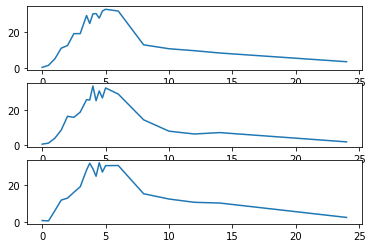

In [210]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3)
for i in range(1, 4):
    axs[i-1].plot(PK_df[PK_df["SUBJ"]==i]["Time"], PK_df[PK_df["SUBJ"]==i]["Cc"])

![AUC](AUC.jpg "AUC idea")

<p>Одним из основных ФК параметров, оцениваемых в исследованиях, является AUC. 
В общем случае, AUC определяется как суммарная площадь под кривой «концентрация действующего вещества – время».</p> 
<p>Может рассчитываться от нуля (момент приема препарата) до некоторого времени T. </p>
<p>Ниже пример функции, которая рассчитывает AUC так, что для возрастающей части кривой 
используется правило линейных трапеций, а для убывающей части кривой используется правило 
логарифмических трапеций.</p>

Правило линейных трапеций:
$$C_i <= C_j, j=i+1$$
$$AUC_{t_i- t_j}={(C_i+C_j)*(t_j-t_i ) \over 2}$$
Правило логарифмических трапеций:
$$C_i > C_j$$
$$AUC_{t_i- t_j}=(C_i-C_j)*{(t_j-t_i) \over (ln⁡C_i-ln⁡C_j)}$$

In [8]:
# measured variable, измеряемая величина
def AUC_func(MV, time1, time2, logdown=True):
    # Проверим, что датафрейм с данными не пуст
    if MV.empty:
        return(float("NaN"))
    
    # Уберем строки с нулевыми концентрациями
    MV=MV.dropna(subset = ['Cc'])
    
    # Выберем данные в рамках выделенного диапазона от времени 1 (time1) до времени 2 (time2)
    MV = MV[(MV["Time"]>=time1)&(MV["Time"]<=time2)]
    
    # Запишем в Var значения концентраций, а в Time - значения времени
    Var = MV["Cc"]
    times = MV["Time"]
    
    # Вычислим AUC
    if not logdown: # logdown = False, AUC вычисляется по правилу линейных трапеций, иначе идем в else
        res=0
        for j in range(0, len(Var)-1):
            res=res+(Var[j+1]+Var[j])*(times[j+1]-times[j])/2
    else: 
        # Если logdown = True, AUC вычисляется по правилу линейных трапеций, если мы "поднимаемся" по кривой
        # и по правилу логарифмических трапеций "на спуске"
        res=0
        for j in range(0, len(Var)-1):
            if Var[j] > Var[j+1] and (np.log(Var[j])-np.log(Var[j+1])):
                # Правило логарифмических трапеций
                res=res+(Var[j]-Var[j+1])*(times[j+1]-times[j])/(np.log(Var[j])-np.log(Var[j+1]))
            else:
                # Правило линейных трапеций
                res=res+(Var[j+1]+Var[j])*(times[j+1]-times[j])/2
    return(res)

Ниже — пример расчета AUC для данных фармакокинетического профиля для первого субъекта с использованием функции AUC_func:

In [212]:
# если пользоваться нашей функцией с logdown = True (по умолчанию)
round(AUC_func(PK_df[PK_df["SUBJ"]==1].reset_index(), time1=0, time2=24), 2)

276.64

Попробуем сделать "то же самое" с помощью пакетов pyton, увидим разницу :) 

In [213]:
from scipy import integrate
round(integrate.trapezoid(PK_df[PK_df["SUBJ"]==1]["Cc"], x=PK_df[PK_df["SUBJ"]==1]["Time"]), 2)

283.21

In [214]:
from sklearn.metrics import auc
round(auc(x=PK_df[PK_df["SUBJ"]==1]["Time"], y=PK_df[PK_df["SUBJ"]==1]["Cc"]), 2)

283.21

In [215]:
# очевидно, в пакетах используется аналог нашей функции с logdown = False
round(AUC_func(PK_df[PK_df["SUBJ"]==1].reset_index(), time1=0, time2=24, logdown = False), 2)

283.21

Также нас могут интересовать параметры: максимальная концентрация и концентрация в первой точке после введения.

In [216]:
AUC_VALUES=[]
subjects_pp=list(PK_df["SUBJ"].unique())
for subj in subjects_pp:
    MV=PK_df[PK_df["SUBJ"]==subj].reset_index()
    AUC_VALUES.append(round(AUC_func(MV, time1=0, time2=24), 2))

In [217]:
CMAX=list(PK_df.groupby("SUBJ")["Cc"].max())
C0=list(PK_df.groupby("SUBJ")["Cc"].first())

Параметры ФК кривых:

In [218]:
PK_Params = pd.DataFrame(
    {'SUBJ': list(range(1, N_PP+1, 1)),
           'AUC0T': AUC_VALUES,
           'CMAX': CMAX,
           'C0': C0})

In [219]:
PK_Params.head()

,SUBJ,AUC0T,CMAX,C0
0,1,276.64,32.9,0.2
1,2,247.29,33.9,0.7
2,3,286.11,32.4,0.7
3,4,265.77,32.7,0.2
4,5,268.74,38.3,0.6


Для этих параметров нас тоже может интересовать описательная статистика:

In [220]:
pk_stats=PK_Params.describe(include = 'all', percentiles=[.10, .90])
pk_stats.round(decimals = 3)

,SUBJ,AUC0T,CMAX,C0
count,48.0,48.000,48.000,48.000
mean,24.5,281.157,36.025,0.408
std,14.0,21.622,1.959,0.255
min,1.0,237.570,31.800,0.000
10%,5.7,254.140,33.070,0.100
50%,24.5,280.990,36.450,0.350
90%,43.3,310.999,38.500,0.730
max,48.0,317.020,39.900,0.900


Или иначе, можем использовать нашу функцию для описательной статистики:

In [221]:
# создаем списки с параметрами и их "названиями", а также датафрейм для статистик
pk_parameters=["AUC0T", "CMAX", "C0"]
pk_paramnames=["AUC", "Cmax", "C0"]
pk_paraminfo=[(pk_parameters[i], pk_paramnames[i]) for i in range(0, len(pk_paramnames))]
pkstats_df=pd.DataFrame(columns=["Statistics", "Values"])

In [222]:
# в цикле считаем все статистики
for par, name in pk_paraminfo:
        pkstats_df=pd.concat([pkstats_df, descr_stat(df=PK_Params, param=par, paramname=name, dgt=2)], ignore_index=True)
# посмотрим на результаты 
pkstats_df

,Statistics,Values
0,AUC,
1,mean,281.16
2,sd,21.62
3,median,280.99
4,"Q1, Q3","(265.77, 299.39)"
5,"Min, Max","(237.57, 317.02)"
6,Cmax,
7,mean,36.03
8,sd,1.96
9,median,36.45


Рассмотрим снова датасет формата ADaM: ADPC или Pharmacokinetics Concentrations Analysis Dataset.

In [5]:
import os
cwd = os.getcwd()

In [6]:
# загружаем датасет ADPC-like (аналогичный ADPC)
adpc_df = pd.read_excel(cwd + '\ADPC_like.xlsx', engine='openpyxl')
adpc_df[0:50]

,SUBJID,AGE,WEIGHT,RACE,TRTSEQ,APERIOD,ATPT,CONC
0,101,24,75.26,Asian,TR,1,0.25,2.0
1,101,24,75.26,Asian,TR,1,0.50,3.2
2,101,24,75.26,Asian,TR,1,0.75,6.9
3,101,24,75.26,Asian,TR,1,1.00,9.2
4,101,24,75.26,Asian,TR,1,1.25,9.2
5,101,24,75.26,Asian,TR,1,1.50,10.8
6,101,24,75.26,Asian,TR,1,2.00,11.0
7,101,24,75.26,Asian,TR,1,2.50,13.0
8,101,24,75.26,Asian,TR,1,3.00,19.3
9,101,24,75.26,Asian,TR,1,3.50,23.7


In [10]:
# выберем значения только для первого периода
from sklearn.metrics import auc

adpc_df = adpc_df[adpc_df["APERIOD"]==1]
AUC_val=[] # area under the curve
for i in list(adpc_df["SUBJID"].unique()):
    AUC_val.append(round(auc(x=adpc_df[adpc_df["SUBJID"]==i]["ATPT"], y=adpc_df[adpc_df["SUBJID"]==i]["CONC"]), 3))

In [11]:
from scipy import stats
import math 

def k_el(MV):    
    # Уберем строки c NA вместо концентраций
    MV = MV.dropna(subset = ['CONC'])
    
    # Уберем строки с нулевыми концентрациями
    MV = MV[MV['CONC'] != 0]
    
    # Проверим, что датафрейм с данными не пуст
    if MV.empty:
        return(float("NaN"))
    
    # Проверим, что в датасете есть хотя бы три точки
    if len(MV.index)<3:
        return(float("NaN"))
    
    values = list(MV["CONC"]) # вектор концентраций
    times = list(MV["ATPT"]) # вектор временных точек
    
    # Создадим списки индексов значений концентраций длиной от 3 до максимально возможного
    # в том диапазоне, где кривая монотонно убывает (после максимума)
    max_ind = values.index((max(values))) # индекс максимального значения
    last_ind = len(values) - 1 # индекс последнего значения
    
    # создадим список, в который мы добавим все списки с индексами 
    sets = []
    i=last_ind-2 # индекс, по которому мы будем проходить в цикле (сначала создадим самый короткий список, потом - более длинные)
    while i>=max_ind:
        sets.append(list(range(i, last_ind+1)))
        i = i - 1 
        
    # создадим словарь, в который запишем все результаты вычислений угла наклона по наборам точек
    val = {} # dictionary
    # список, в который мы будем записывать значения коэффициентов корреляции
    r_values = []
    # для каждого набора точек, от самого маленького (минимум три) до максимально возможного
    # строим линейную регрессию
    for set_num in list(range(0, len(sets))):
        slope, intercept, r, p, std_err = stats.linregress(np.array([times[i] for i in sets[set_num]]), 
                                        np.array([math.log(values[i]) for i in sets[set_num]]))
        n = len(sets[set_num]) 
        
        # записываем в словарь под номером набора точек список, который содержит
        # n - количество точек, slope - угол наклона прямой, r**2 - коэффициент корреляции
        val.update({str(set_num+1):[n, slope, r**2]})
        r_values.append(r**2)
        
    # выберем максимальное значение коэффициента корреляции    
    r_max_ind = r_values.index(max(r_values)) # индекс максимального значения
    
    # результат - список с числом точек, коэффициентом угла наклона и коэффициентом корреляции
    res = val.get(str(r_max_ind+1))

    return res

In [12]:
# результат работы функции
k_el(adpc_df[(adpc_df["APERIOD"]==1)&(adpc_df["SUBJID"]==101)])

[4, -0.04271185019397174, 0.9835234206922607]

In [13]:
adpc_df_1 = adpc_df[(adpc_df["APERIOD"]==1)&(adpc_df["SUBJID"]==101)]

Другие ФК параметры, которые могут быть релевантны:
+ Время достижения максимальной концентрации $C_{max}$ исследуемого действующего вещества 
+ Период полувыведения лекарственного вещества
+ Константа скорости элиминации действующего вещества
+ $AUC_{0-∞}$
<p>Как их посчитать? </p>

#### Константа скорости элиминации 
$$λ_z, {1 \over ч}$$ Оценивается по угловому коэффициенту конечного участка фармакокинетической кривой, описанного с помощью лог-линейного регрессионного анализа
#### Период полувыведения 
$$t_{1/2} = {ln2 \over λ_z}$$
#### Время достижения максимальной концентрации 
$argmax_t Ci$
#### Суммарная площадь под кривой от 0 до ∞
Вомзожно рассчитать только при наличии оценки $t_{1/2}$ 
$$AUC_{0-∞} = AUC_{0-t} + {C_{0-t} \over λ_z}$$
$C_t$ — расчетное значение действующего вещества в последней определяемой пробе